# <center>Herzinfarktrisiko Analyse und Vorhersage</center>

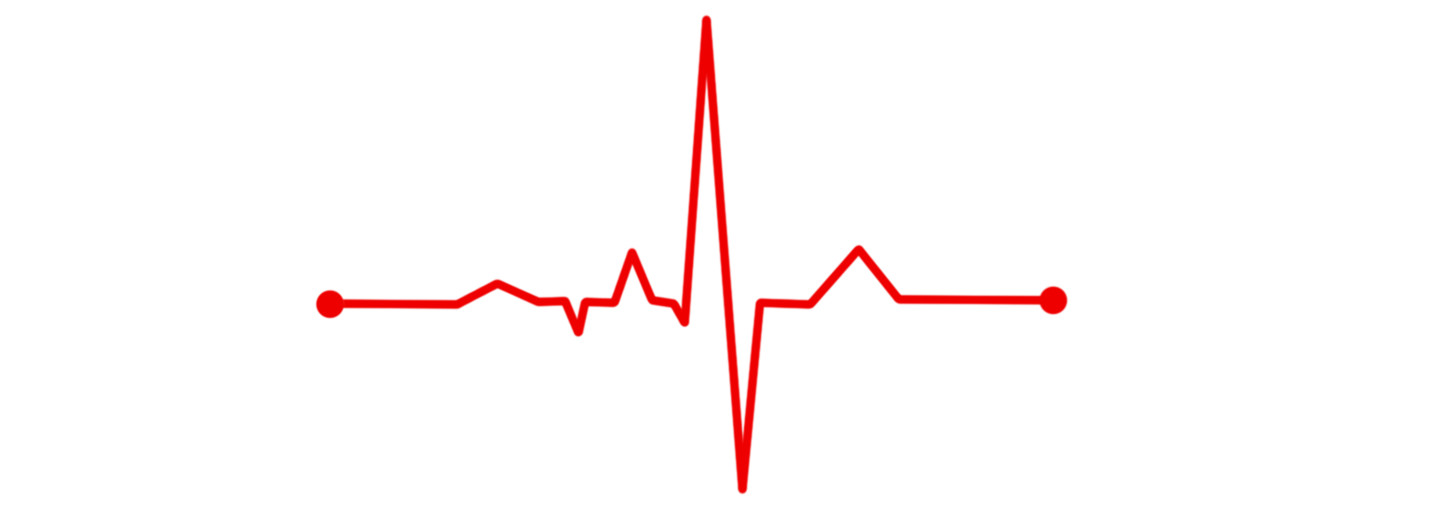

---

## Inhaltsverzeichnis

1. [Einleitung](#einleitung)<br>
    1.1 [Vorgehen und Aufbau der Analyse](#vorgehen)<br>
    1.2 [Wahl des Modells](#wahl)>br>
    1.3 [Technische Voraussetzungen](#technische)<br>
2. [Exploratory Data Analysis](#eda)<br>
    2.1 [Daten laden und Erstsichtung](#laden)<br>
    2.2 [Beschreibung des Datensets & Variabeln](#beschreiben)<br>
    2.3 [Univariate Analyse](#univar)<br>
    2.4 [Bivariate Analyse](#bivar)<br>
    2.5 [Multivariate Analyse](#multivar)<br>
3. [Datacleaning und Vorbereitung](#datacl)<br>
    3.1 [Ausreisser](#ausr)<br>
    3.2 [Transformation](#trans)<br>
    3.3 [Identifikation und Entfernen Dublikate](#dubli)<br>
    3.4 [Imputation falscher Werte](#imputation)<br>
    3.5 [Dummy-Variablen](#dummy)<br>
4. [Modelling](#modelling)<br>
    4.1 [Datenvorbereitung](#vorbereitung)<br>
    4.2 [Modelle aufsetzen und optimieren](#modelle)<br>
5. [Ergebnisse](#ergebnisse)<br>
    5.1. [Interpretation ausgewählter Variabeln](#interpret)<br>
6. [Fazit und Optimierungsempfehlung](#fazitundopt)<br>
    6.1 [Fazit](#fazit)<br>
    6.2 [Optimierungsempfehlung](#opt)<br>
7. [Quellen](#quellen)<br>

---

## 1. Einleitung<a name="einleitung"></a>

Kardiovaskuläre Erkrankungen sind weltweit die häufigste Todesursache. Sie machen mit rund 18 Millionen Sterbefälle 32% aller Todesfälle aus. Mehr als 4 von 5 Sterbefälle sind davon auf Herzinfarkte zurückzuführen ([1]( https://www.who.int/health-topics/cardiovascular-diseases/#tab=tab_1)). Alleine in Deutschland erleiden jährlich über 300.000 Menschen einen Herzinfarkt([2]( https://www.herzstiftung.de/infos-zu-herzerkrankungen/herzinfarkt)).

Gleichzeitig befindet sich das Gesundheitswesen in einer digitalen Transformation. Ärztinnen und Ärzte werden bei der Diagnose, Überwachung oder im OP immer mehr von Algorithmen unterstützt ([3](https://www.iks.fraunhofer.de/de/themen/kuenstliche-intelligenz/kuenstliche-intelligenz-medizin.html)). Insbesondere bei der Diagnose und der Vorhersage von Krankheiten, werden immer öfters ML oder AI eingesetzt. Vorhersagen mit Unterstützung von maschinell ermittelte Algorithmen können bereits das Herzinfarktrisiko genauer voraussagen als Ärzte ([4](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0174944)).

In dieser Analyse soll auf Basis von Patientendaten das Herzinfarktrisiko analysiert und vorhergesagt werden. Die analyseleitenden Fragen sind:
- Mit welcher Genauigkeit kann das Herzinfarktrisiko vorhergesagt werden?
- Welche Faktoren erhöhen oder senken das Risiko?
- Wie verändern die einzelnen Faktoren die Chance eines Herzinfarktes?

Dazu wird ein Datensatz mit Messwerten von 303 Patienten mittels eines ML-Models ausgewertet. Der Datensatz auf Kaggle **[Heart Attack Analysis & Prediction](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)** basiert dabei auf dem Datensatz der **[UCI](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)**. Im Datenset sind 14 von 76 Attributen enthalten. Die Patientendaten stammen von der V.A. Medical Center, Long Beach and Cleveland Clinic Foundation.

### 1.1 Vorgehen und Aufbau der Analyse<a name="vorgehen"></a>

1. Der estte Schritt der Analyse ist das Laden, (erste) Sichten und Bereinigen der Daten
2. Im Teil Exploratory Data Analysis werden die Daten mit passenden Analysen und Visualisierungen auf fehlende Daten, Zusammenhänge und Ausreisser untersucht
3. Auf Basis der EDA werden die Daten bereinigt, transfomiert und optimiert. Dieser Schritt ist die Vorbereitung für den Einsatz des Machine Learning Modells.
4. Die Daten werden mit dem gewählten Modell analysiert und das Modell mit geeigneten Methoden optimiert.
5. Zum Abschluss werden die Ergebnisss des Modelles und der Vorhersage dargestellt und im letzten Kapitel eine Ausschau bzw. Optimierungspotential diskutiert. 

### 1.2 Wahl des Modells<a name="wahl"></a>

In dieser Prüfungsleitung soll nicht nur das ML-Modell optimiert werden, sondern auch die einzelnen Faktoren analysiert werden. Aus diesem Grund wurde auf den Vergleich bzw. Modellierung unterschiedlicher Modell verzichtet.
Diese Analyse hat zum Ziel, Vorhrsagen mit Wahrscheinlichkeiten zu machen und den Einfluss der einzelnen Faktoren zu analysieren. Mit diesem Fokus und der binären Zielvariable eigenet sich die `Logistische Regression` als ML- Modell.
Die logistische Regression ist ein Modell, das eine abhängige binäre Variable erklären kann und eine entsprechende Vorhersage der Wahrscheinlichkeit treffen, mit der ein Ereignis eintritt oder nicht. Zudem können die einzelnen unabhängigen Variabeln auf ihren Einfluss auf die Wahrscheinlichkeit des Eintritts analysiert werden.

### 1.3 Technische Voraussetzungen<a name="technische"></a>

| Package  | Versionsnummer | Zweck |
|:--|:-:|:--|
| [Pandas](https://pandas.pydata.org/docs/) | 1.3.4 | Grundlegendes Package zur Manipulation und Transformation der Datensets |
| [Seaborn](https://seaborn.pydata.org/) | 0.11.2  | Package basierend auf Matplotlib für schnelle Visualisierungen von Daten  |
| [NumPy](https://numpy.org/) | 1.20.3 | Python-Bibliothek, die ein mehrdimensionales Array-Objekt, verschiedene abgeleitete Objekte (z. B. maskierte Arrays und Matrizen) und eine Reihe von Routinen für schnelle Operationen auf Arrays bereitstellt |
| [Matplotlib](https://matplotlib.org/) | 3.4.3 | Matplotlib ist eine umfassende Bibliothek zur Erstellung statischer, animierter und interaktiver Visualisierungen in Python |
| [Sklearn](https://scikit-learn.org/stable/) | 0.24.2 | Einfache und effiziente Tools für die prädiktive 

In [1]:
# Prüfen, ob Package installiert ist in Umgebung
import sys
import importlib.util
%matplotlib inline
%load_ext autoreload
%autoreload

packages = ["pandas", "seaborn", "numpy", "matplotlib", "sklearn"]

for name in packages:
    try:
        __import__(name)
    except ImportError:
        print(name)
        !pip.main(['install', package])

In [2]:
# Importiere benötige Packages und gebe die Versionsnummer aus

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import sklearn
import pickle

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
print('Sklearn:',sklearn.__version__)
print('Matplotlib:',matplotlib.__version__)
print('NumPy:',np.__version__)
print('Seaborn:',sns.__version__)
print('Pandas:',pd.__version__)

Sklearn: 0.24.2
Matplotlib: 3.4.3
NumPy: 1.20.3
Seaborn: 0.11.2
Pandas: 1.3.4


## 2. Exploratory Data Analysis<a name="eda"></a>

### 2.1 Daten laden und Erstsichtung<a name="laden"></a>

In [4]:
#Lade der Daten
data = pd.read_csv("./data/heart.csv")

#Erstellen einer Copy
hea_df = data.copy()

#Prüfen, ob das Datenset geladen wurde
hea_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Prüfen, ob die Angeben aus Kaggle stimmten (303, 14)
print("\nAnzahl der Zeilen und Spalten im Datensatz:",hea_df.shape)

#Sichtung der Spalten
print("\nSpalten des Datensets: ", hea_df.columns)


Anzahl der Zeilen und Spalten im Datensatz: (303, 14)

Spalten des Datensets:  Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


### 2.2 Beschreibung des Datensets & Variabeln<a name="beschreiben"></a>

Die Beschreibung des Datensets auf Kaggle war nicht vollständig und musste ergänzt werden. Dazu waren die [Diskussione](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion) auf Kaggle sowie die Dokumentation der [UCI](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) hilfreich. Für die medizinischen Begriffe und die Bedeutung für Herzinfarkte musste zusätzlich Recherchiert werden.

Der Datensatz besteht aus 303 Einträgen mit 14 Attributen bzw. Merkmalen. Es liegen kategoriale sowie numerische Daten vor. Die kategorialen nicht binären Variabeln sind nicht ordinal. 

- `Age`: Alter der Patienten in Jahren
- `Sex`: Das Geschlecht der Patienten
    - 0 = Frau
    - 1 = Mann
- `cp` : Brutschmerzenart
    - 0 = typischer Brustschmerz
    - 1 = untypischer Brustschmerz
    - 2 = nichtanginaler Brustschmerz
    - 3 = asymptomatisch
- `trtbps` : Ruhepuls in [mm / hg]
- `chol` : Cholesterin gemessen mit BMI-Sensor [mg/dl]
- `fbs` : Blutzucker nüchtern > 120 mg/dl
    - 0 = nein
    - 1 = ja
- `restecg`: Ruhe EKG
    - 0 = normal
    - 1 = vorhandene ST-T [Endstreckenveränderung](https://www.universimed.com/ch/article/kardiologie-gefaessmedizin/endstreckenveraenderungen-im-ruhe-ekg-2099701)
    - 2 = mögliche oder bestätigte [linksventrikuläre Hypertrophie nach Estes Kriterien](https://www.universimed.com/at/article/kardiologie-gefaessmedizin/die-linksherzhypertrophie-im-ekg-2099644)
- `thalachh` : Höchste erreichte Herzfrequenz [Schläge / Minute]
- `exng`: Belastungsinduziertes Brustschmerzen
    - 0 = nein
    - 1 = ja
- `oldpeak`: [ST-Strecken-Senkung](https://www.fokus-ekg.de/inhalt-von-a-z/ekg-technische-aspekete/belastungs-ekg/) in Ruhe im Verhältniss zu Belastung
- `slp` : Verlauf der [ST-Strecke nach Peak](https://www.fokus-ekg.de/inhalt-von-a-z/normales-ekg/st-strecke/)
    - 0 = hebend
    - 1 = horizontal
    - 2 = abfallend
- `caa`: Anzahl grosser Herzgefässe [0 - 3]
- `thall` : Thalassämien oder Mittelmeeranämie 
    - 0 = null
    - 1 = normal 
    - 2 = geheilt
    - 3 = reversibler Defekt
- `output`: Diagnose von Herzerkrankung (Angiografie Resultat) ([3](https://www.netdoktor.de/diagnostik/angiografie/))
    - 0 = Verängung < 50% = niedriges Herzinfaktrisiko
    - 1 = Verängung > 50% = erhöhtes Herzinfarktrisiko

In [6]:
hea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Alle Werte ausser `oldpeak`liegen als `int64`vor. Das macht soweit auch Sinn, da `oldpeak`ein Verhältniss angibt. Die restlichen Merkmale liegen entweder als binäre, kategoriale oder ganzahlige Variabeln vor.

In [7]:
#Gibt es NaN-Werte im Datenset
hea_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Das Datensetz hat keine fehlenden Werte.

In [8]:
hea_df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

Kein Merkmal ist nunice.
Beim Merkmal `caa`gibt es den Wert 5 aus. Hier muss ein Fehler vorliegen, da es nur Werte von 0-3 geben kann.


In [9]:
hea_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Beim Beschrieb des Datensetzs können wir sehen dass:
- Der Durchschnittliche Patient 54 Jahre alt ist
- Die Geschlechterverteilung nicht 50/50 ist
- Beim Cholesterin `chol` gibt es einen sehr hohen max-Wert, was auf Ausreisser hindeutet
- Bei `oldpeak`gibt es Werte von 0 bis 6.2
- Beim Ruhe Blutdruck `trtbps`ist der max-Wert weit über dem 75%-Quartiel.
- Beim höchsten erreichten Puls `thalachh` scheint es Ausreisser zu geben

### 2.3 Univariate Analyse<a name="univar"></a>

In [10]:
#Für die weitere Betrachtung werden die die kategorischen und numerischen Merkmale in seperaten Listen gespeichert.
num_col = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
cat_col = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"]

In [11]:
#Für die Einheitliche Darstellung in der Analyse wird ein Thema gwählt #RdYlBu
sns.set_theme(style="darkgrid", palette="RdBu", font="Helvetica")

#### 2.3.1 Zielvariable

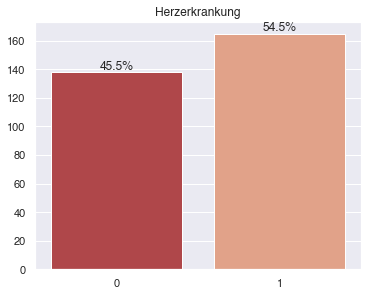

In [12]:
#Die Zielvariable wird als Countplot mit der prozentualen Verteilung ausgegeben
plt.figure(figsize=(5,4), constrained_layout = True )

ax = sns.countplot(data = hea_df, x="output")
plt.title("Herzerkrankung")
ax.set_xlabel("")
ax.set_ylabel("")
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100 * p.get_height()/hea_df["output"].count()), 
                    (p.get_x()+0.4, p.get_height()), 
                    ha="center", va="bottom");



Die Verteilung in der Zielvariable ist nicht gleichverteilt. Es liegen mit 54.4% mehr Patienten mit einer Herzerkrankung vor als ohne.

#### 2.3.2 Analyse kategorialer Merkmale

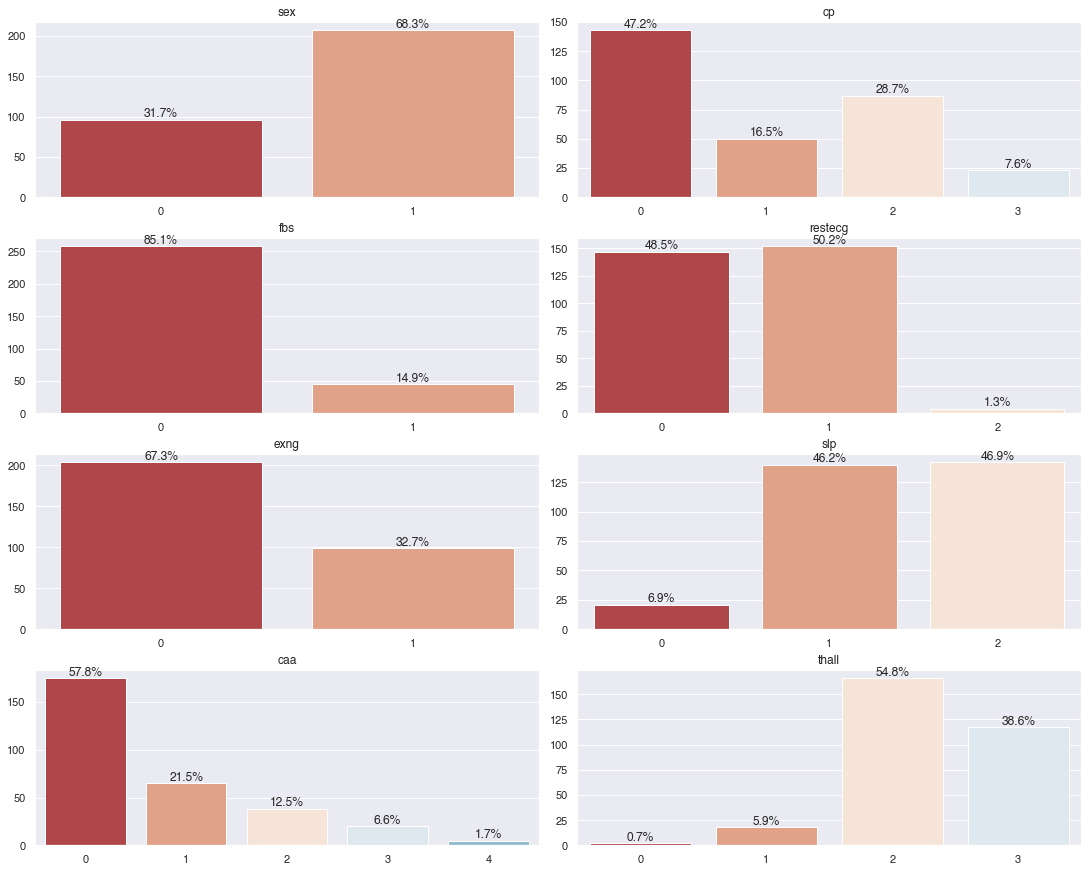

In [13]:
#Zuerst werden die kategorialen Merkmale mit einem Countplot dargestellt
#und die prozentuale Verteilung berechnet!
plt.figure(figsize=(15,12), constrained_layout = True )
rows, cols = 4, 2

counter = 1
for i in cat_col:
    plt.subplot(rows, cols, counter)
    ax = sns.countplot(data = hea_df, x= i,)
    plt.title(i)
    ax.set_xlabel("")
    ax.set_ylabel("")
    counter+=1
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100 * p.get_height()/hea_df[i].count()), 
                    (p.get_x()+0.4, p.get_height()), 
                    ha="center", va="bottom")

Folgende Beobchtungen wurden gemacht:
- Es gibt deutlich mehr Männer als Frauen im Datenset. 
- Der häufigste Brustschmerz `cp` ist der typische Brustschmerz mit dem Value 0. 
- Die meisten Patienten haben keine erhöhten Blutzucker `fbs`
- Es gibt fast gleich häufig normale wie abnormale Ruhepuls `restecg`
- Belastungsinduzierte Brustschmerzen `exng` treten bei 33 Prozent auf
- Das ST-Segment `slp`tritt der flache Verlauf gleich häufig auf wie der Verlauf nach unten
- Bei der Anzahl der grossen Herzgefässe `caa` gibt es einen Wert von 4 der nicht möglich ist (0-3). Die meisten Patienten haben keine Auffäligkeit. 
- Bei Thalassämien `thall`haben die meisten Patienten einen normalen Befund rsp. einen reversiblen Defekt. Die Null-Werte müssen allerdings bearbeitet werden. 

#### 2.3.4 Analyse Verteilung stetiger Variabeln

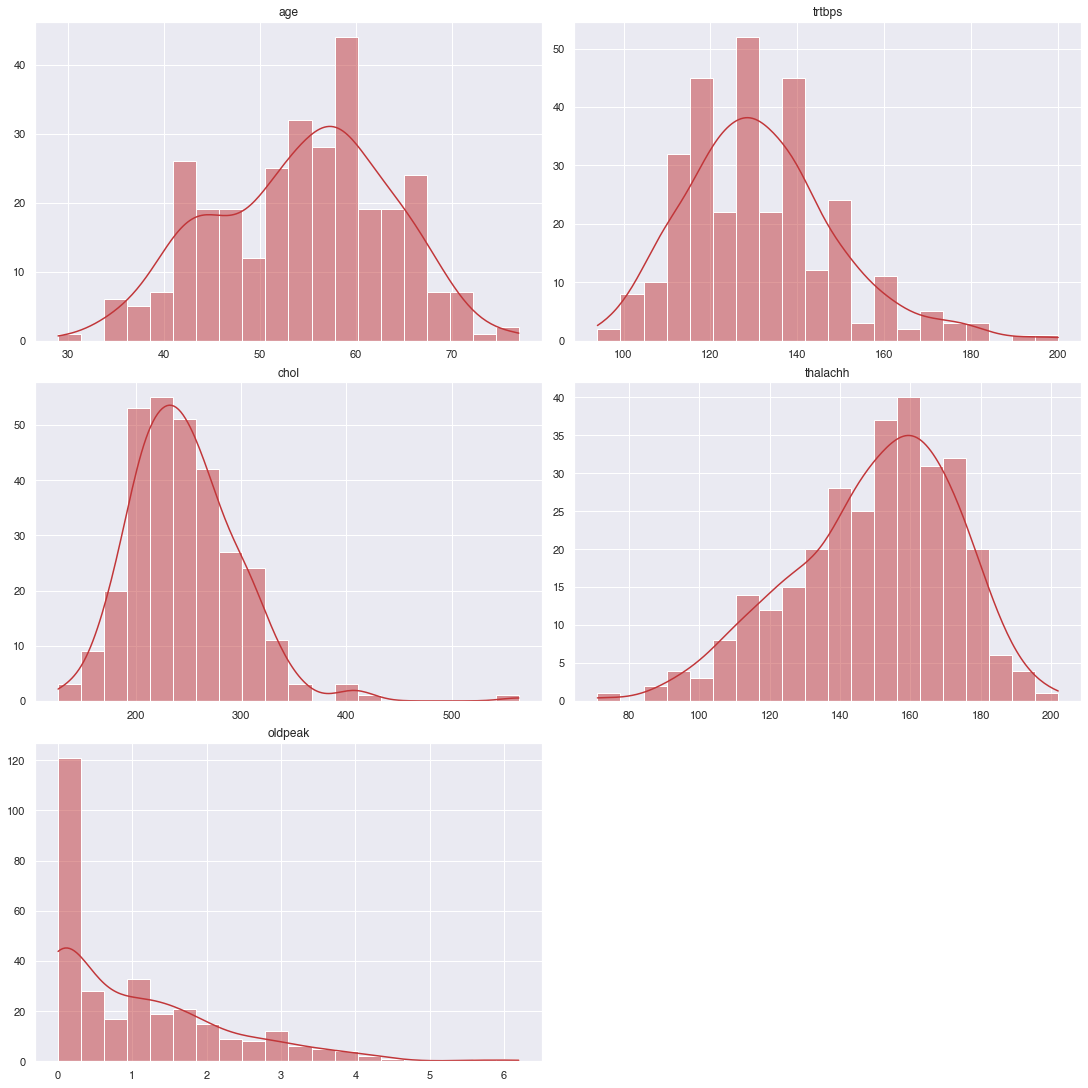

In [14]:
#Die numerischen Variabeln werden mit einem Histplot dargestellt und die Kerndichteschätzung (KDE) ausgegeben
rows, cols = 3, 2
plt.figure(figsize=(15,15), constrained_layout = True )

counter = 1
for i in num_col:
    plt.subplot(rows, cols, counter)
    sns.histplot(data = hea_df, x= i, bins=20, kde=True)
    plt.title(i)
    plt.xlabel("")
    plt.ylabel("")
    counter+=1

In [15]:
#zu den Grafen wird gleichzeitig die Skewness ausgegeben, um die Schiefe zu beurteilen
hea_df_skewness = hea_df[["age", "trtbps", "chol", "thalachh", "oldpeak"]].skew().sort_values(ascending=False)
hea_df_skewness

oldpeak     1.269720
chol        1.143401
trtbps      0.713768
age        -0.202463
thalachh   -0.537410
dtype: float64

Bei der Analyse der numerischen Variablen konnten folgende Beobachtungen gemacht werden:
- `oldpeak`hat Werte zwischen Null und 6.2 und ist stak rechtsschief. Das leigt an den vielen 0 Werten, die für keine Auffälligkeiten bei diesem EKG-Test stehen. Die Daten sollte transfomiert werden. Die log-Transformation fällt dabei raus, da log für die 0 nicht definiert ist.
- `chol`ist stark rechtsschief aufgrund eines einzelnen sehr hohen Wertes. Das muss bei der Ausreisseranalyse genauer betrachtet werden.
- dasselbe gilt für `trtbps`. Die Verteilung wird von einzelnen hohen Werten stark beeinflusst.
- `thalchh`ist leicht linksschief aufgrund eines sehr tiefen Wertes. Das wird bei der Ausreisseranalyse genauer betrachtet.
- `age`ist nur leicht linksschief.

#### 2.3.5 Analyse Ausreisser

Für die Analyse der Ausreisser wird zuerst ein Boxplot der numerischen Merkmale erstellt und im zweiten Schritt mit der IQR-Methode die Ausreisser identifiziert.

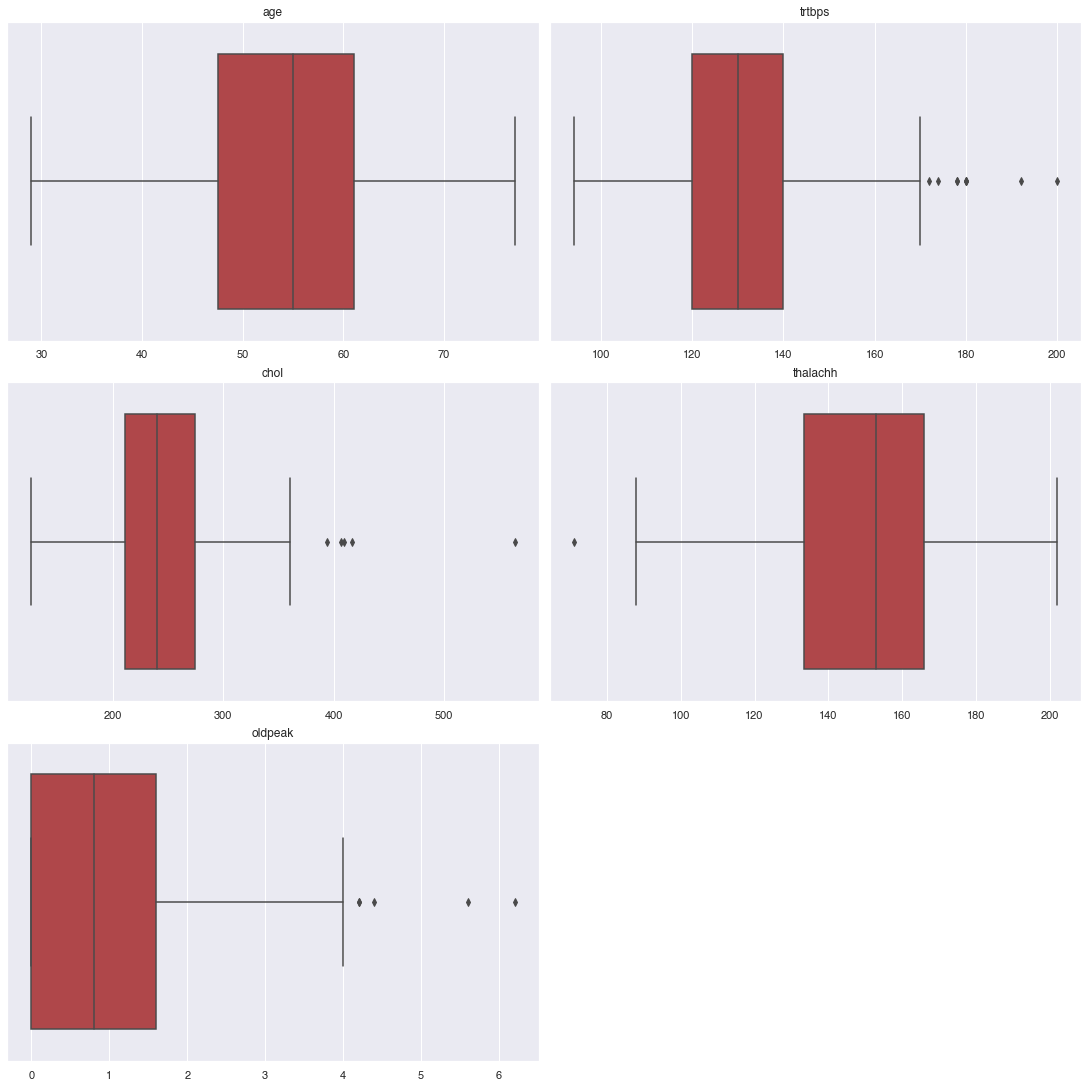

In [16]:
#Erstellen der Boxplot
rows, cols = 3, 2
plt.figure(figsize=(15,15), constrained_layout = True)

counter = 1
for i in num_col:
    plt.subplot(rows, cols, counter)
    sns.boxplot(data = hea_df, x= i)
    plt.title(i)
    plt.xlabel("")
    counter+=1

In [17]:
Q1 = hea_df["trtbps"].quantile(0.25)
Q3 = hea_df["trtbps"].quantile(0.75)
IQR = float(Q3 - Q1)
lower_bound = float(Q1 - 1.5 * IQR)
upper_bound = float(Q3 + 1.5 * IQR)

trtbps_out = hea_df["trtbps"][(hea_df["trtbps"] > upper_bound)]
trtbps_out


8      172
101    178
110    180
203    180
223    200
241    174
248    192
260    178
266    180
Name: trtbps, dtype: int64

In [18]:
Q1 = hea_df["chol"].quantile(0.25)
Q3 = hea_df["chol"].quantile(0.75)
IQR = float(Q3 - Q1)
lower_bound = float(Q1 - 1.5 * IQR)
upper_bound = float(Q3 + 1.5 * IQR)

chol_out = hea_df["chol"][(hea_df["chol"] > upper_bound)]
chol_out

28     417
85     564
96     394
220    407
246    409
Name: chol, dtype: int64

In [19]:
Q1 = hea_df["thalachh"].quantile(0.25)
Q3 = hea_df["thalachh"].quantile(0.75)
IQR = float(Q3 - Q1)
lower_bound = float(Q1 - 1.5 * IQR)
upper_bound = float(Q3 + 1.5 * IQR)

thalachh_out = hea_df["thalachh"][(hea_df["thalachh"] < lower_bound)]
thalachh_out

272    71
Name: thalachh, dtype: int64

In [20]:
Q1 = hea_df["oldpeak"].quantile(0.25)
Q3 = hea_df["oldpeak"].quantile(0.75)
IQR = float(Q3 - Q1)
lower_bound = float(Q1 - 1.5 * IQR)
upper_bound = float(Q3 + 1.5 * IQR)

oldpeak_out = hea_df["oldpeak"] [(hea_df["oldpeak"] > upper_bound)]
oldpeak_out

101    4.2
204    6.2
221    5.6
250    4.2
291    4.4
Name: oldpeak, dtype: float64

- Einen Ruheblutdruck `trtbps` von mehr als 180 ist eine schwere [Hypertonie](https://www.hirslanden.ch/de/corporate/themen-im-fokus/herz-im-rhythmus/blutdruck-blutdruckwerte.html#blutdruckwerte-ueberblick). Diese Werte können wichtig sein, um einen Herzinfarkt anzuzeigen.
- Werte von Cholesterin `col` (Triglyceride (mg/dl)) um die 400 sind sehr hoch und ein [Gesundheitsrisiko](https://www.zavamed.com/de/cholesterinwerte-tabelle.html). Entsprechend sollten sie in der Analyse berücksichtigt werden. Der Wert von 564 muss allerdings ein Fehler sein und sollte entfernt werden. 
- Einen Puls von unter 80 bei Belastung `thalachh` scheint unwahrscheinlich und ist ein Ausreisser. Dieser Wert sollte ersetzt oder entfernt werden.
- Die Werte von `oldpek` über vier gelten nach der IQR-Methode als Ausreisser. Ohne Einschätzung eines Experten, kann aber keine Aussage getroffen werden, ob das tatsächlich ein Ausreisser ist. Dazu wurden auch in der Literaturrecherche keine Hinweise gefunden. Die Werte werden im Sample belassen, um keine Informationen zu verlieren.

### 2.4 Bivariate Analyse<a name="bivar"></a>

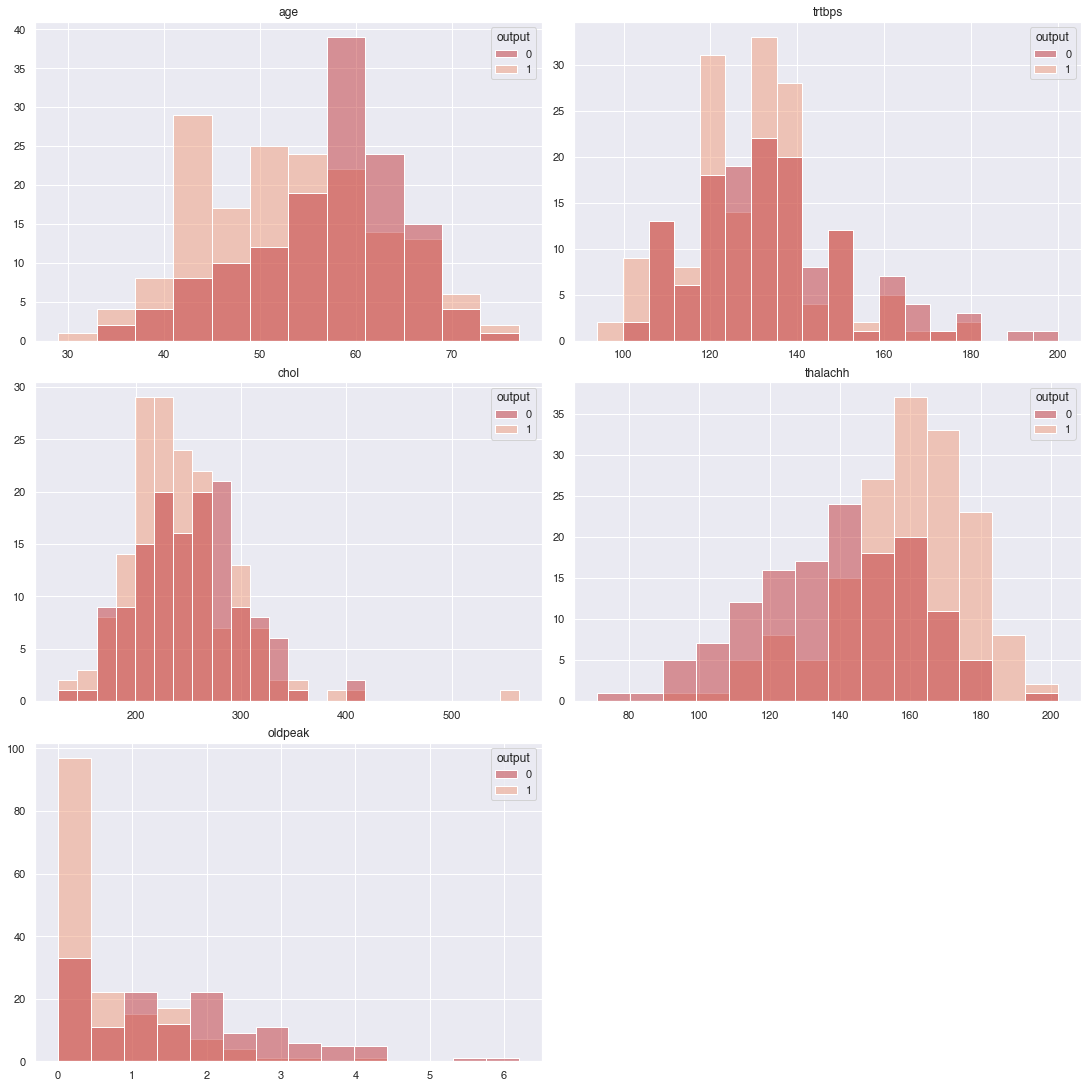

In [21]:
#Vergleich der numerischen Mermalen mit dem Vorhandensein einer Herzerkrankung
rows, cols = 3, 2
plt.figure(figsize=(15,15), constrained_layout = True)

counter = 1
for i in num_col:
    plt.subplot(rows, cols, counter)
    sns.histplot(data=hea_df, x=i, hue="output", fill=True,)
    plt.title(i)
    plt.xlabel("")
    plt.ylabel("")
    counter+=1

Bei der bivariaten Analysen der numerischen Merkmale wurde folgendes Beobachtet:
- Das Alter `age` korreliert nicht mit dem Risiko eines Herzinfarktes. Patienten anfangs bis Mitte 40 sind am meisten betroffen.
-  Ein hoher Ruheblutdruck `trtbps` scheint nicht eindeutig mit einem höheren Risiko verbunden zu sein
- Auch ein hoher Cholesterinwert `chol` zeigt kein deutlich höheres Risiko
- Eine hoher Herzfrequenz bei Belastung `thalachh` kann auf ein erhöhtes Risiko hinweisen
- Bei `oldpeak` scheint ein Zusammenhang zwischen einem tiefen Wert und einer Herzerkrankung zu bestehen

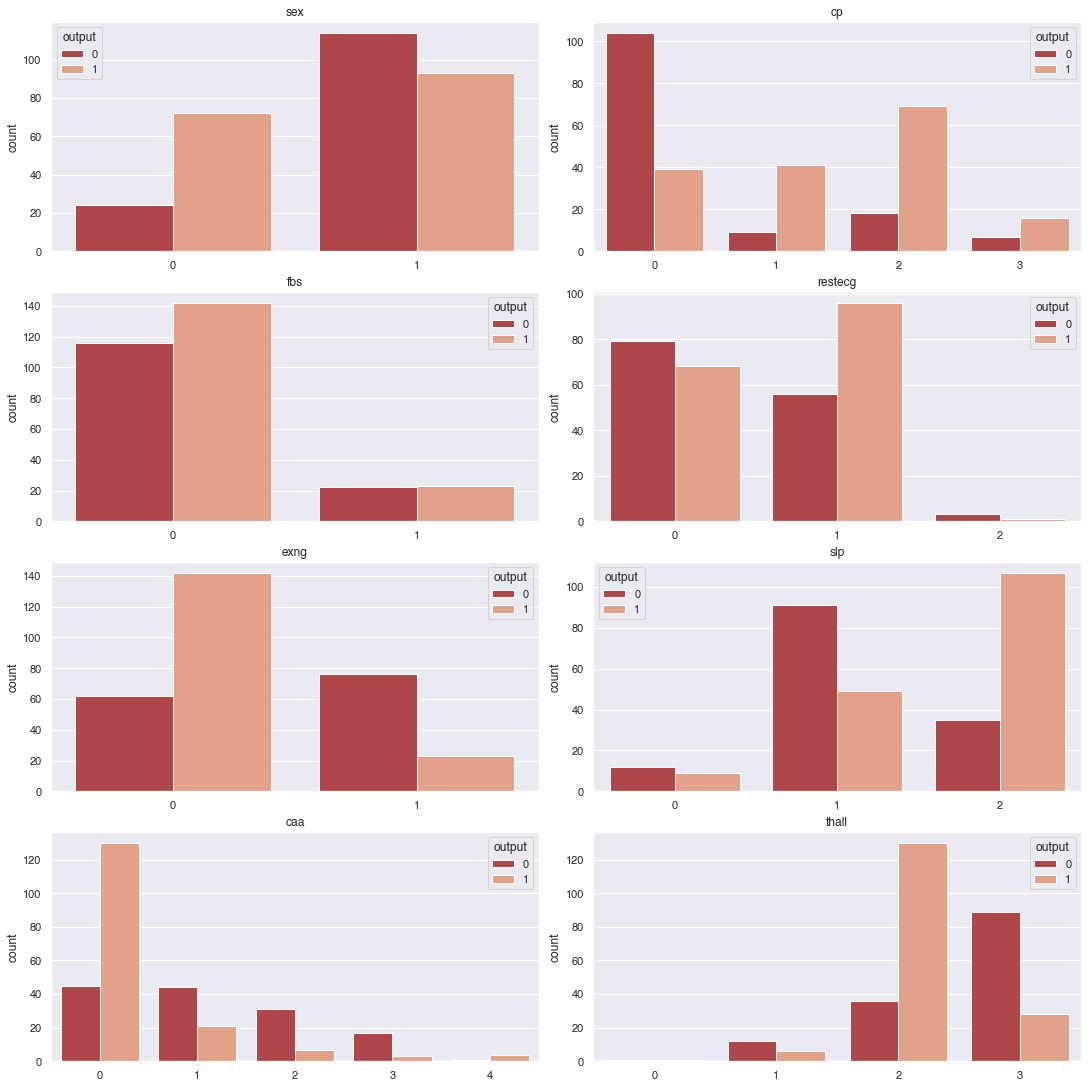

In [22]:
#Vergleich der kategorialen Merkmalen mit dem Vorhandensein einer Herzkrankheit
rows, cols = 4, 2
plt.figure(figsize=(15,15), constrained_layout = True)

counter = 1
for i in cat_col:
    plt.subplot(rows, cols, counter)
    sns.countplot(data = hea_df, x= i, hue='output', fill=True)
    plt.title(i)
    plt.xlabel("")
    counter+=1

Bei der bivariaten Analyse der kategorischen Variablen mit der Herzkrankheit wurden folgenden Beobachtungen gemacht:
- Das Herzinfarktrisiko ist bei nicht-anginalen Schmerzen am höchsten und bei asymptomatischen am geringsten.
- Beim Blutzucker verteilen sich die Patienten mit hohem oder niedrigem Risiko gleichmäßig. Die meisten Patienten haben aber keine erhöhten Blutzucker.
- Beim Ruhe EKG verteilen sich die Patienten mit hohem oder niedrigem Risiko fast gleichmäßig. Es gibt einen höheren Anteil bei einer ST-T Abnormität.
- Bei den Patienten mit hohem Risiko tritt belastungsinduzierte Schmerzen deutlich weniger auf. Bei Patienten mit niedrigem Risiko treten Schmerzen fast gleich häufig auf. 
- Bei slp tritt bei mit hohem Risiko die Senkung häufiger auf und bei Patienten mit niedrigem Risiko den flachen Verlauf.
- Patienten mit hohem Risiko haben deutlich mehr den Wert 0 bei der Fluoroskopie. Patienten mit niedrigem Risiko sind gleichmäßiger verteilt. 
- Patienten mit hohem Risiko haben deutlich öfter eine geheilte Thalassämien. Bei Patienten mit niedrigem Risiko tritt häufiger ein reversibler Defekt auf.

### 2.5 Multivariate Analyse<a name="multivar"></a>

Im nächsten Schritt wird untersucht, ob es Korrelationen zwischen den Merkmalen gibt (Multikorrelation).
Dazu wird eine Korrelationsmatrix erstetellt. Für die Korrelation wird die Spearman-Methode verwendet.

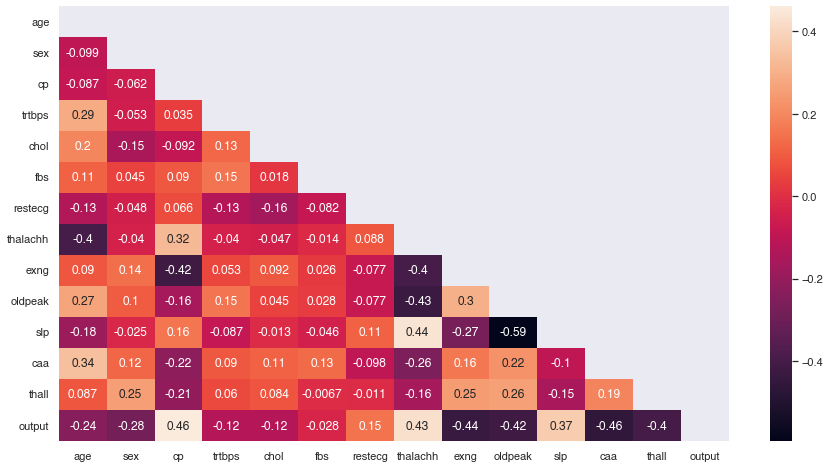

In [23]:
#Berechnung der Korrekationen
hea_corr = hea_df.corr(method="spearman")

#Maske, um nur die Hälft darzustellen
mask = np.triu(np.ones_like(hea_corr))

#Erstellen der Korrelationsmatrix
plt.figure(figsize = (15, 8))
sns.heatmap(data = hea_corr, annot=True, mask=mask);

Es gibt keine sehr starken Korrelationen zwischen den Merkmalen, ausser zwischen `oldpeak`und `slp`. Beide Merkmale sind Werte aus EKG Messungen und sollten näher untersucht werden.

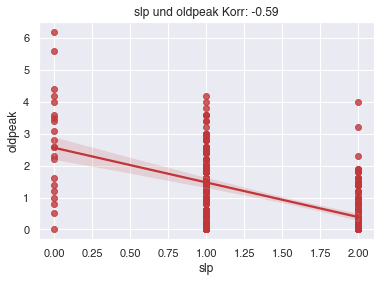

In [24]:
g = sns.regplot(data=hea_df, x="slp", y="oldpeak")
g.set_title("slp und oldpeak Korr: -0.59");

Ein abfallender Verlauf der ST-Strecke `slp`kommt häufig vor mit tiefen Werten der `oldpeak`Messung. Im Gegenzug tritt ein ansteigender Verlauf eher mit höheren Werten von `slp` auf. Entsprechend liegt eine negative Korrelation vor. Die hohe Zahl der 0 Werte bei `oldpeak`erschwert die Interpretation. Beide Merkmale basieren auf einer EKG-Messung der ST-Strecken. Eine Korrelation ist daher nicht unwahrscheinlich, wenn man annimmt, dass ein ein Herzproblem beide Messungen beeinflussen. In dieser Analyse werden beide Merkmale berücksichtigt. Es kann nicht mit Sicherheit gesagt werden, dass die beiden Merkmale dasselbe Symptom darstellen. Bei einer vertieften Analyse bzw. Optimierung, müsste mit Expert:innenwissen die Merkmale untersucht werden.

## 3. Datacleaning und Vorbereitung<a name="datacl"></a>

Für die weitere Analyse werden die Daten bereinigt und vorbereitet. Aus den vorhergehenden Betrachtungen konnte festgestellt werden, dass es keine fehlende Werte gibt. Die Variablen `caa` und `thall`haben falsche Werte, die Ausreißer werden bereinigt, eine Transformation der Variable `oldpeak`vorgenommen und Duplikate identifiziert und entfernt.
Für die Vorbereitung der Daten für das ML-Modell werden die nicht binären kategorialen Variablen (`cp`, `thall`, `slp`, `caa`) in Dummies umgewandelt, da die Kategorien nominal und nicht ordinal sind.   

In [25]:
#Zuerst wird eine weitere Kopie der Daten erstellt
hea_cl_df = hea_df.copy()

### 3.1 Ausreisser<a name="ausr"></a>

Aus der vorgeangen Analyse und Überlegungen werden beim Cholesterin `col`nur die Werte über 400 und beim Ruhepuls `thalachh`Werte unter 80 gelöscht. 

In [26]:
# Die Ausreisser werden erst mit .loc indentifiziert und dann mit .drop() aus dem Datensatz gelöscht
outlier_chol = hea_cl_df.loc[hea_df["chol"] > 500].index
outlier_chol

Int64Index([85], dtype='int64')

In [27]:
hea_cl_df = hea_df.drop(outlier_chol)

In [28]:
# Die Ausreisser werden erst mit .loc indentifiziert und dann mit .drop() aus dem Datensatz gelöscht
outlier_thalachh = hea_cl_df.loc[hea_df["thalachh"] < 80].index 
outlier_thalachh

Int64Index([272], dtype='int64')

In [29]:
hea_cl_df = hea_cl_df.drop(outlier_thalachh)

### 3.2 Transformation<a name="trans"></a>

Bei der Analyse der Verteilung wurde eine starke rechtsschiefe Verteilung von `oldpeak`festgestellt. Diese Werten werden durch Quadrieren transformiert. Die restlichen stetigen Variablen zeigten geringe Schiefen auf bzw. waren durch extreme Ausreißer leicht verzerrt. Die sollten nach der Bereinigung im letzten Schritt nochmals betrachtet werden. 

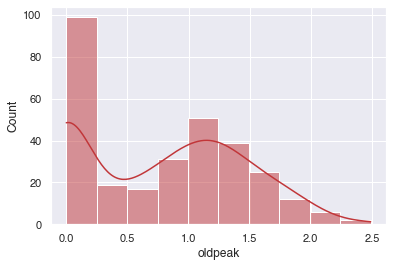

In [30]:
#oldpeak wir durch eine Quartrat-Transformation geändert, um eine annähernde Normalverteilung zu erhalten.
# Die vielen 0 Werte bleiben dennoch bestehen.  
hea_cl_df["oldpeak"] = np.sqrt(hea_cl_df["oldpeak"])
sns.histplot(data = hea_cl_df["oldpeak"], kde=True);

In [31]:
# Kontrolle der Schiefe nach der Bereinigung und der Transformation
hea_df_skewness = hea_cl_df[["age", "trtbps", "chol", "thalachh", "oldpeak"]].skew().sort_values(ascending=False)
hea_df_skewness

trtbps      0.703896
chol        0.520873
oldpeak     0.169729
age        -0.196003
thalachh   -0.457123
dtype: float64

Die Scewness-Werte sind nun deutlich besser und trotz den Einschränkungen, kann von einer annäherenden Normalverteilung aus gegangen werden. Dazu werden die Histogramme nochmals gedruckt.

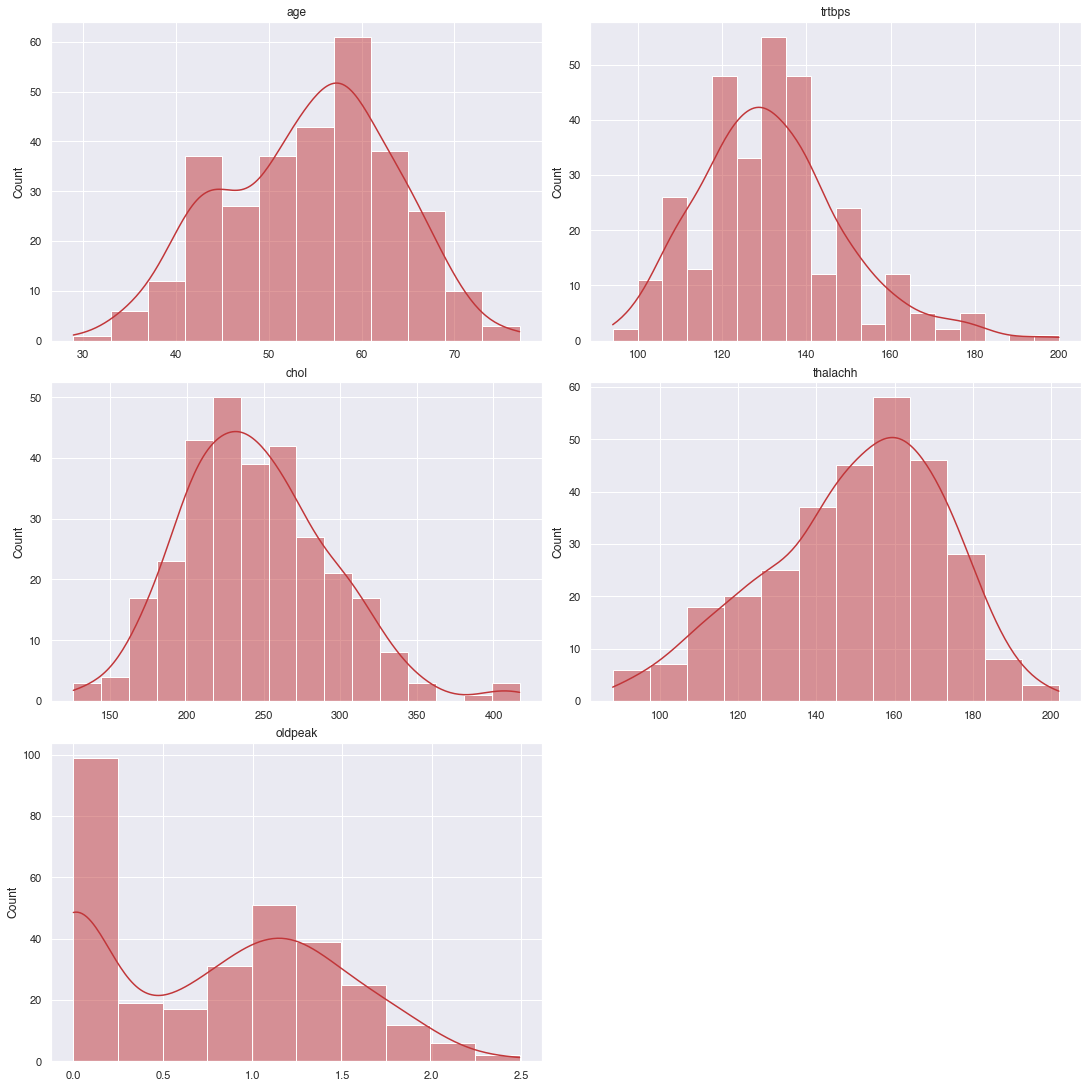

In [32]:
rows, cols = 3, 2
plt.figure(figsize=(15,15), constrained_layout = True )

counter = 1
for i in num_col:
    plt.subplot(rows, cols, counter)
    sns.histplot(data = hea_cl_df, x= i, kde=True)
    plt.title(i)
    plt.xlabel("")
    counter+=1

### 3.3 Identifikation und Entfernen Dublikate<a name="dubli"></a>

In [33]:
hea_cl_df.duplicated().sum()

1

In [34]:
hea_cl_df = hea_cl_df.drop_duplicates()

### 3.4 Imputation falscher Werte<a name="imputation"></a>

Die falschen Werte von `caa`und `thall`werden imputiert. Da es sich um kategoriale Variabeln handelt, wird die .median() Methode verwendet.

0.0    177
1.0     65
2.0     38
3.0     20
Name: caa, dtype: int64


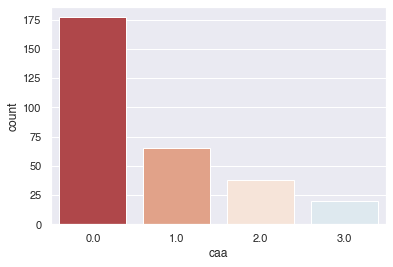

In [35]:
# Werte mit 4 werden durch den Median ersetzt.
hea_cl_df["caa"] = hea_cl_df.apply(lambda row: hea_df["caa"].median() if row["caa"] == 4 else row["caa"], axis=1)


#Kontrolle der Imputation
print(hea_cl_df["caa"].value_counts())
sns.countplot(data = hea_cl_df, x="caa", fill=True);

2.0    166
3.0    116
1.0     18
Name: thall, dtype: int64


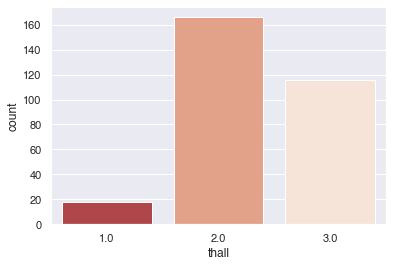

In [36]:
# Werte mit 0 werden durch den Median ersetzt
hea_cl_df["thall"] = hea_cl_df.apply(lambda row: hea_df["thall"].median() if row["thall"] == 0 else row["thall"], axis=1)

#Kontrolle der Imputation
print(hea_cl_df["thall"].value_counts())
sns.countplot(data = hea_cl_df, x="thall", fill=True);

In [37]:
#Kontrolle des bearbeitenden Datasets
hea_cl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       300 non-null    int64  
 1   sex       300 non-null    int64  
 2   cp        300 non-null    int64  
 3   trtbps    300 non-null    int64  
 4   chol      300 non-null    int64  
 5   fbs       300 non-null    int64  
 6   restecg   300 non-null    int64  
 7   thalachh  300 non-null    int64  
 8   exng      300 non-null    int64  
 9   oldpeak   300 non-null    float64
 10  slp       300 non-null    int64  
 11  caa       300 non-null    float64
 12  thall     300 non-null    float64
 13  output    300 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 43.3 KB


Das Datenset hat nach der Bereinigung noch 300 von den ursprünglichen 303 Einträgen. Die Ausreisser hätten auch mit der .mean() oder KNN Methode imputiert werden können. Darauf wurde wurde hier aber verzichtet.

### 3.5 Dummy-Variablen<a name="dummy"></a>

Die nicht binären kategorialen Variabeln (`restecg`,`cp`, `thall`, `slp`, `caa`) sind nominal und werden daher in Dummies umgewandelt.

In [38]:
#Von den einzelnen Columns werden die Dummies erstellt
hea_cl_df = pd.get_dummies(hea_cl_df, columns = ["restecg" ,"cp", "thall", "slp", "caa"], drop_first=True)

In [39]:
#Kontrolle
hea_cl_df.columns

Index(['age', 'sex', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak',
       'output', 'restecg_1', 'restecg_2', 'cp_1', 'cp_2', 'cp_3', 'thall_2.0',
       'thall_3.0', 'slp_1', 'slp_2', 'caa_1.0', 'caa_2.0', 'caa_3.0'],
      dtype='object')

In [40]:
#Für die weitere Bearbeitung das bearbeitete Datenset gespeichert und eine neue Kopie erstellt
hea_cl_df.to_csv("./data/hea_cl.csv")
hea_ml_df = hea_cl_df.copy()

In [41]:
hea_ml_df.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,output,restecg_1,...,cp_1,cp_2,cp_3,thall_2.0,thall_3.0,slp_1,slp_2,caa_1.0,caa_2.0,caa_3.0
0,63,1,145,233,1,150,0,1.516575,1,0,...,0,0,1,0,0,0,0,0,0,0
1,37,1,130,250,0,187,0,1.870829,1,1,...,0,1,0,1,0,0,0,0,0,0
2,41,0,130,204,0,172,0,1.183216,1,0,...,1,0,0,1,0,0,1,0,0,0
3,56,1,120,236,0,178,0,0.894427,1,1,...,1,0,0,1,0,0,1,0,0,0
4,57,0,120,354,0,163,1,0.774597,1,1,...,0,0,0,1,0,0,1,0,0,0


___

## 4. Modelling<a name="modelling"></a>

Wie in der Einleitung erläutert, wird in dieser Analyse mit dem `Logistische Regressionsmodell` gearbeitet. Damit können Eintrittswahrscheinlichkeiten der Zielvariable geschätzt werden und die unabhängigen Variablen interpretiert werden.

Im ersten Schritt werden die `default`Einstellung gewählt. 
Für die Feinabstimmung des Modells wird mit dem `GridSearchCV` anschließend die "optimalen" Parameter eruiert. Die Modelle werden dann Verglichen und das bessere für die Auswertung herangezogen.

Für die Evaluation des Modells wird neben dem `accuracy_score` ein `classification_report` erstellt. Zwei wichtige Maße, die man aus dem classification_report herauslesen kann, sind die Spezifität und die Sensitivität. Die Sensitivität wird auch Trefferquote genannt und bezeichnet den Anteil der richtig positiven an der Gesamtanzahl der positiven Objekte. Die Spezifität bezeichnet dagegen den Anteil der richtig negativen an der Gesamtzahl der negativen Objekte.Diese Masse sind Besonders im medizinischen Kontext wichtig. Wenn eine Krankheiten diagnostiziert werden sollen und man möglichst viele Kranke als krank (Sensitivität) und möglichst viele Gesunde auch als gesund (Spezifität) klassifizieren möchte([5](https://www.inwt-statistics.de/blog-artikel-lesen/Logistische_Regression_Klassifikationsguete.html). Bei einer binären Klassifikation ist die Sensitivität der `recall`der positiven und die Sensitivität `recall`der negativen Klassen ([6](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). Ergänzt werden die Zahlen durch die Visualisierung mittels der `confusion_matrix`. Für einen rasche Kontrolle und Einschätzung des Modells eignet sich die Matrix, da sie aufzeigt, wie viele Werte True positiv/negativ oder False positiv/negativ vorausgesagt werden.

### 4.1 Datenvorbereitung<a name="vorbereitung"></a>

In [42]:
#Trennen der un-/abhängigen Vatiabeln
X = hea_ml_df.drop("output",axis=1)
y = hea_ml_df["output"]

#Split der Daten in Training und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

**Scaling** Die numerischen Variablen werden skaliert, da sie in unterschiedlichen Skalen vorliegen. Zudem können durch die Skalierung, der Effekt der Variablen direkt verglichen werden. Der Nachteil ist, dass die Interpretation komplizierter wird. Mehr dazu im Ergebnissteil.
Es werden nur die numerischen Variablen skaliert. Eine Skalierung der kategorialen Variablen macht wenig Sinn und die Interpretation wäre nicht mehr möglich.
Dazu wird zuerst eine neue Liste mit den kategorialen Variablen erstellt und dann mit der Funktion `part_scaling`die numerischen Variablen skaliert. [Credits](https://www.justintodata.com/logistic-regression-example-in-python/)

In [43]:
#Erstellen einer Liste mit den Kategorischen Variabeln
cat_dum_col = list(set(hea_ml_df.columns) - set(num_col) - {"output"})

In [44]:
#Funktion zum partiellen Scalieren des Datensets
scaler = StandardScaler()
scaler.fit(X_train[num_col])
 
def part_scaling(df, num_col, cat_dum_col, scaler):
    X_num_scaled = scaler.transform(df[num_col])
    X_cat = df[cat_dum_col].to_numpy()
    X = np.hstack((X_cat, X_num_scaled))
    return X
 
X_train = part_scaling(X_train, num_col, cat_dum_col, scaler)
X_test = part_scaling(X_test, num_col, cat_dum_col, scaler)

Im nächsten Schritt wird das Modell aufgesetzt mit den ersten Vorhersagewerten

### 4.2 Modelle aufsetzen und optimieren<a name="modelle"></a>

In [45]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test,lr_pred)
lr_cm = confusion_matrix(y_test, lr_pred)


 0.88
************************************************************
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        39
           1       0.88      0.90      0.89        51

    accuracy                           0.88        90
   macro avg       0.88      0.87      0.88        90
weighted avg       0.88      0.88      0.88        90

************************************************************


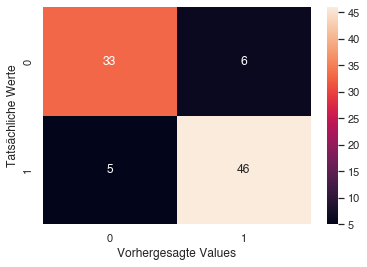

In [46]:
print("\n",round(lr_acc, 2))
print("*"*60)
print(classification_report(y_test,lr_pred))
print("*"*60)
cm_plot = sns.heatmap(lr_cm, annot=True)
cm_plot.set_xlabel('Vorhergesagte Values')
cm_plot.set_ylabel('Tatsächliche Werte');

Das Modell ist zu 88% akkurat. Die Spezifität ist 0.85 und die Sensitivität 0.90. Das Modell sagt entsprechend zu 90% richtig voraus, wenn ein Patient ein Herzinfarktrisko hat und in 85% wenn kein Risiko besteht. Die Werte sind schon ziemlich gut. Allerdings sind die 15% falschen Vorhersagen für kein Herzinfarktrisiko problematisch, da kein Risiko vorausgesagt wird, obwohl eins besteht.

Im nächsten Schritt soll mit `GridSearchCV`die optimalen Parameter für das Modell gefunden werden [Credits](https://towardsdatascience.com/tuning-the-hyperparameters-of-your-machine-learning-model-using-gridsearchcv-7fc2bb76ff27)

In [47]:
#Parameter definieren
logreg = LogisticRegression()
parameters = {
    "penalty" : ["l1","l2"],
    "C"       : np.logspace(-4, 4, 20),
    "max_iter": list(range(100,800,100)),
    "solver"  : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}


#Modell aufsetzen
clf = GridSearchCV(logreg,                       
                   param_grid = parameters,   
                   scoring="accuracy",        
                   cv=10)

clf.fit(X_train,y_train)

print("Tuned Hyperparameters :", clf.best_params_)

Tuned Hyperparameters : {'C': 1.623776739188721, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


Neues Modell mit den im letzten Schritt bestimmten Parameter aufsetzten.

In [48]:
lr2 = LogisticRegression(C = 1.623776739188721,
                         max_iter = 100,
                        penalty = 'l1', 
                        solver = 'saga')

lr2.fit(X_train, y_train)
lr2_pred = lr2.predict(X_test)
lr2_acc = accuracy_score(y_test,lr2_pred)
lr2_cm = confusion_matrix(y_test, lr2_pred)


 0.86
************************************************************
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        39
           1       0.87      0.88      0.87        51

    accuracy                           0.86        90
   macro avg       0.85      0.85      0.85        90
weighted avg       0.86      0.86      0.86        90

************************************************************


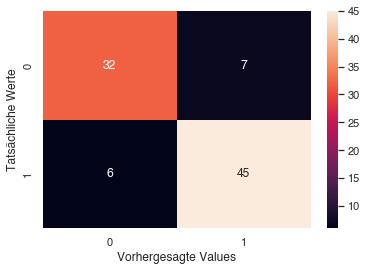

In [49]:
print("\n",round(lr2_acc, 2))
print("*"*60)
print(classification_report(y_test,lr2_pred))
print("*"*60)
cm_plot = sns.heatmap(lr2_cm, annot=True)
cm_plot.set_xlabel('Vorhergesagte Values')
cm_plot.set_ylabel('Tatsächliche Werte');

Paradoxerweise erweist sich das 2. Modell als weniger Akkurat. Der F1-Score für Eintreten liegt mit 87% ebenfalls tiefer. Für diese Analyse wird entsprechend mit dem 1. Modell und den `default`Einstellungen (C=1.0, penalty="l2", max_iter=100, solver="lbfgs") weitergearbeitet. Bei einer vertieften Betrachtung müsste die Einstellungen der `GridSearchCV` überarbeitet werden.

In [50]:
#An dieser Stelle werden die beiden Modelle gespeichert
filenames = ["lr.sav", "lr2.sav", "clf.sav"]
models = [lr, lr2, clf]

for i in range(3):
    pickle.dump(models[i], open(filenames[i], "wb"))

## 5. Ergebnisse<a name="ergebnisse"></a>

Für die Analyse der einzelnen Merkmale werden die Koeffizienten des 1. Modell `lr` dargestellt und interpretiert. Die Koeffizienten alleine sind schwer zu interpretieren und sagen etwas über die Richtung und Stärke des Einflusses im Verhältnis zu den anderen Koeffizienten aus. Das ist möglich, weil die Variablen standardisiert wurden. Der Koeffizient der logistischen Regression für eine unabhängige Variable ist die erwartende Veränderung in log odds für das Eintreten für jede Veränderung von X. Bei standardisierten Werten ist das die Standardabweichung und bei kategorischen Variablen die Änderung zur Referenzkategorie.
Wird eine unabhängige Variabel um eine Standardabweichung verschoben oder springt zur nächsten Kategorie, erhöhen sich die odds des Eintretens um eβ.

In [51]:
coef_df = pd.DataFrame(lr.coef_[0], X.columns, columns=["Koeffizient"]).sort_values(by="Koeffizient", ascending=False) 
coef_df

,Koeffizient
restecg_2,1.174409
sex,1.148563
cp_2,0.581189
chol,0.497934
cp_1,0.464394
caa_2.0,0.393678
cp_3,0.361615
slp_1,0.204514
thall_2.0,0.156037
fbs,-0.088170


Der im Verhältniss stärkste positiven Einfluss in Modell hat der asymptomatische Brustschmerz `cp_3`und das Cholesterin `chol`. Der sträkste negative Einfluss hat das Alter `age`und das Vorhandensein von belastungsinduziertem Schmerz `exng`.

Im nächsten Schritt werden die Koeffizienten in 'Odds' umgewandelt, um sie sinnvoll interpretieren zu können. Gleichzeitig wird den Odds (Chance) den Wert 1 abgezogen, um die Erhöhung/Senkung der Chance direkt ablesen zu können. Zu beachten ist, dass nicht direkte die Wahrscheinlichkeit betrachtet wird, sondern das Verhätniss von der Wahrscheinlichkeit des Eintrettens zur Wahrscheinlichkeit des Nichteintretens (hier Chance eines Herzinfarktes genannt).

In [52]:
#Dataframe mit den Standardtabweichungen der numerischen Variabeln
pd.DataFrame(data={'Variabel': num_col, 'Std': np.sqrt(scaler.var_)})

,Variabel,Std
0,age,8.836530
1,trtbps,16.896902
2,chol,48.621006
3,thalachh,22.457812
4,oldpeak,0.640086


In [53]:
result_df = pd.DataFrame({"Variabel": X.columns, 
                     "coef": lr.coef_[0], 
                     "odds": np.exp(lr.coef_[0]), "odds-1": np.exp(lr.coef_[0])-1})
result_df

,Variabel,coef,odds,odds-1
0,age,-1.601424,0.201609,-0.798391
1,sex,1.148563,3.153657,2.153657
2,trtbps,-1.010995,0.363857,-0.636143
3,chol,0.497934,1.645318,0.645318
4,fbs,-0.088170,0.915605,-0.084395
5,thalachh,-2.174543,0.113660,-0.886340
6,exng,-0.490361,0.612405,-0.387595
7,oldpeak,-0.735628,0.479204,-0.520796
8,restecg_1,-1.070002,0.343008,-0.656992
9,restecg_2,1.174409,3.236229,2.236229


### 5.1. Interpretation ausgewählter Variabeln<a name="interpret"></a>

Hier werden exemplarisch ein paar Variabeln interpretiert. Die Interpretation einzelner Werte gilt, wenn alle anderen Werte konstant bleiben. 
- `age`: Die Chance eines Herzinfarktes sinkt mit jeder Standardtabweichung beim Alter (8.8 Jahre) um 79%.
- `sex`: Die Chance von männlichen Patienten einen Herzinfarkt zu haben ist rund doppelt so hoch als bei Frauen.
- `chol`: Eine Erhöhung des Cholesterinwertes um 48mg/ml erhöht die Chance eines Herzinfarktes um 64,5% 
- `restecg_2`: Liegt bei einem Patienten eine linksvaskuläre hypertrophie vor, ist die Chance einen Herzinfarkt zu haben doppelt so hoch (223%) höher.
- `cp_2`: Patienten mit nichtanginalen Schmerzen haben gegenüber Patienten mit typischen Brustschmerzen eine erhöhte Chance um 78% 
- `caa_2.0`: Werden bei einem Patienten bei 2 Herzkranzgefässe Probleme diagnostiziert, erhöht sich die Chance um 48% gegenüber keinem Befund.
- `thall_3.0`Patienten mit einer Thalassämien mit reversiblem Defekt haben eine 58% geringere Chance als Patienten mit normaler.

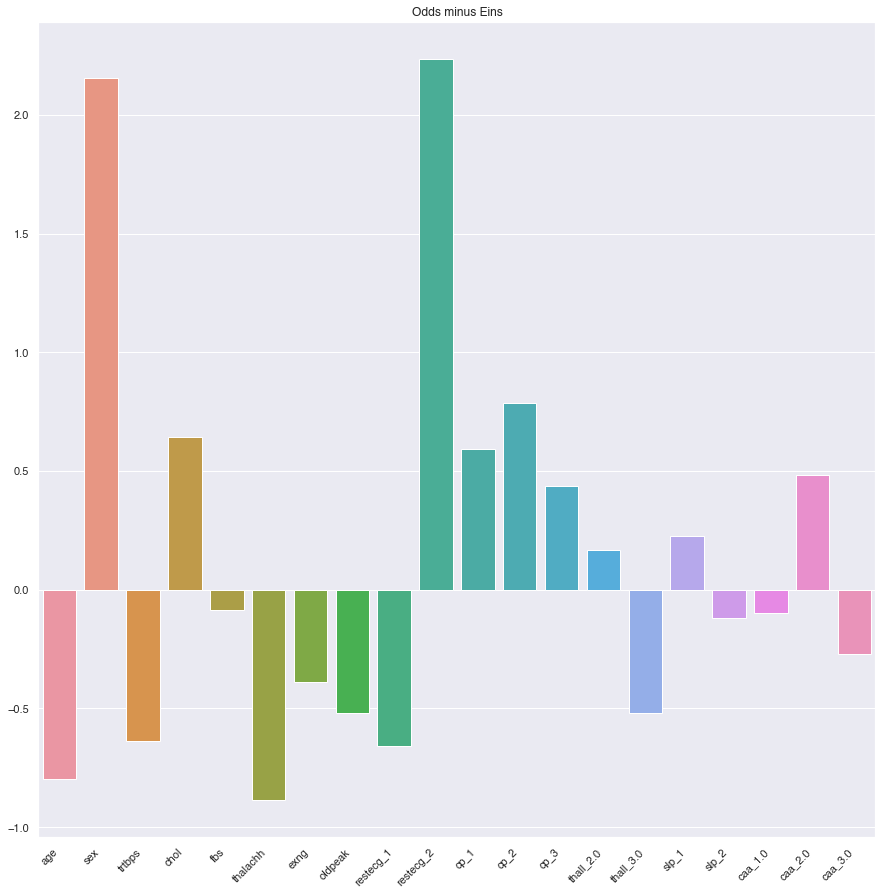

In [56]:
fig, ax = plt.subplots(figsize=(15, 15))

ax = sns.barplot(data=result_df, 
                y='odds-1', 
                x="Variabel")
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title("Odds minus Eins")
ax.set_xticklabels(ax.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right');



## 6. Fazit und Optimierungsempfehlung<a name="fazitundopt"></a>

### 6.1 Fazit<a name="fazit"></a>

Mit dem vorliegenden Datensatz und den einzelnen Arbeitsschritten, konnte ein Modell mit einem guten Vorhersagewert erstellt werden. Eine Accurancy von 88% ist für die beschränkte Zeit und Erfahrung zufriedenstellend.

Die Interpretation einzelner Merkmale mit Aussagen zu der Veränderung der Eintrittschance eines Herizinfakrtes ist nich unproblematisch. Mit dem Modell kann die Eintrittswahrscheinlichkeit als ganzes gut vorausgesagt werden. Die einzelnen Merkmale bzw. ihren Beitrag zur Senkung oder Erhöhung der Eintrittschance sind aber von den anderen Merkmalen abhängig. Über das Vorzeichen kann aber die Richtung des Beitrages analysiert werden.

Das Data Wrangling und Feature Engineering war ohne medizinisches Fachwissen nicht einfach. Es wurde viel Recherche betrieben, um die einzelnen Merkmale einschätzen zu können und Entscheidungen zu treffen. Dennoch müsste ein:e Expert:in hinzugezogen werden, um z.B. die Ausreißer beurteilen zu können. Es wurde überlegt, ob z.B. das Merkmal `oldpeak` mit den vielen 0-Werten nicht in eine kategoriale Variable transformiert werden sollte. Dazu fehlte aber das entsprechende Wissen.

Das Datenset war mit 303 Einträgen relativ klein und für eine weitere Optimierung würde es nützlich sein, nicht nur den von Cleveland zu nutzen, sondern auch jene von Ungarn, der Schweiz und Long Beach, die von der UCI oder hier auf [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) zur Verfügung stehen.

Bei wiederholtem durchlaufen des Notbooks waren die Modelle sehr konsistent. Die Stärke und zum Teil auch die Richtung der Koeffizienten ändert sich allerdings. Ich vermute, dass es bei den unterschiedlichen Train und Test Sets leigt. Konnte das aber nicht mehr genauer untersuchen. 

Bei einem neuen Anlauf würde die Datenaufbereitung und das Feature Engineering mit einer [ML-Pipeline](https://towardsdatascience.com/from-ml-model-to-ml-pipeline-9f95c32c6512) gemacht. Das wird dann der nächste Schritt Richtung Data Analyst.

### 6.2 Optimierungsempfehlung<a name="opt"></a>

Bei der Bearbeitung sind ein paar Dinge aufgefallen, die ein Optimierungspotential haben. Diese wurden teilweise bereits bei den entsprechenden Stellen vermerkt. Werden hier aber nochmals aufgeführt:
- Expert:innenwissen: Für die Datenvorbereitung (Data Wrangling und Feature Engineering) sollte mindestens ein Gespräch oder gemeinsame Beurteilung der einzelnen Merkmale und ihrer Ausprägungen stattfinden.
- Eine vertiefte Betrachtung der `oldpeak`Variabel mit einer möglichen umcodieren.
- Hyperparameter Tuning: Mit `GridSearchCV`wurde ein Tuning durchgeführt, dass allerdings keine besseren Ergebnisse ergaben als die `default` Einstellungen. Hier könnte man nochmals ansetzen und die Parametereinstellung optimieren.
- Erweiteretes Datenset mit mehr Patientendaten verwenden: [Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

## 7. Quellen<a name="quellen"></a>

- (1) https://www.who.int/health-topics/cardiovascular-diseases/#tab=tab_1
- (2) https://www.herzstiftung.de/infos-zu-herzerkrankungen/herzinfarkt
- (3) https://www.iks.fraunhofer.de/de/themen/kuenstliche-intelligenz/kuenstliche-intelligenz-medizin.html
- (4) https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0174944

- https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
- https://archive.ics.uci.edu/ml/datasets/Heart+Disease
- https://www.universimed.com/ch/article/kardiologie-gefaessmedizin/endstreckenveraenderungen-im-ruhe-ekg-2099701
- https://www.universimed.com/at/article/kardiologie-gefaessmedizin/die-linksherzhypertrophie-im-ekg-2099644
- https://www.fokus-ekg.de/inhalt-von-a-z/normales-ekg/st-strecke/
- https://www.netdoktor.de/diagnostik/angiografie/
- https://www.hirslanden.ch/de/corporate/themen-im-fokus/herz-im-rhythmus/blutdruck-blutdruckwerte.html#blutdruckwerte-ueberblick
- https://www.zavamed.com/de/cholesterinwerte-tabelle.html
- https://www.justintodata.com/logistic-regression-example-in-python/
- https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
- https://towardsdatascience.com/from-ml-model-to-ml-pipeline-9f95c32c6512